Import essential libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

Importing data

In [ ]:
data1k = pd.read_csv("exampleClass1DatasetSize1000.csv")
data10k = pd.read_csv("exampleClass1DatasetSize10000.csv")
data100k = pd.read_csv("exampleClass1DatasetSize100000.csv")
data1m = pd.read_csv("exampleClass1DatasetSize1000000.csv")
data10m = pd.read_csv("exampleClass1DatasetSize10000000.csv")

Sorting algorithms

In [ ]:
def insertionsort(arr):
    if len(arr) < 2:
        return arr, 0

    i = 1
    comparisons = 0
    while i < len(arr): #traverse through array
        comparisons += 1
        if arr[i] < arr[i-1]: #if the element is smaller than the preceding element
            j = i-1
            while j > 0: #traverse through previous elements to find next smallest
                comparisons += 1
                if arr[i] > arr[j-1]:
                    break
                j -= 1
            temp = arr[i] #store element
            arr[j+1:i+1] = arr[j:i] #shift array right by one position
            arr[j] = temp #perform swap
        i += 1
    return arr, comparisons

def merge(arr1, arr2):
    comparisons = 0
    newarr = [] #new array

    while len(arr1) > 0 and len(arr2) > 0: #check that both arrays are not empty
        comparisons += 1
        if arr1[0] <= arr2[0]: #append the bigger first element among the two arrays
            newarr.append(arr1[0])
            arr1.pop(0)
        else:
            newarr.append(arr2[0])
            arr2.pop(0)

    if len(arr1) == 0:
        newarr += arr2 #if first array empty, add second array to the back
    else:
        newarr += arr1 #if second array empty, add first array to the back

    return newarr, comparisons

def mergesort(arr):
    if len(arr) < 2:
        return arr, 0
    elif len(arr) == 2:
        if arr[0] > arr[1]:
            return [arr[1], arr[0]], 0
        return arr, 0

    leftarr, comparisons1 = mergesort(arr[:int(len(arr)/2)])
    rightarr, comparisons2 = mergesort(arr[int(len(arr)/2):])
    newarr, comparisons3 = merge(leftarr, rightarr)
    return newarr, comparisons1 + comparisons2 + comparisons3


def hybridsort(arr, s):
    if len(arr) < s:
        return insertionsort(arr)
    else:
        leftarr, comparisons1 = hybridsort(arr[:int(len(arr)/2)], s)
        rightarr, comparisons2 = hybridsort(arr[int(len(arr)/2):], s)
        newarr, comparisons3 = merge(leftarr, rightarr)
        return newarr, comparisons1 + comparisons2 + comparisons3

3ii.) With the input size n fixed, plot the number of key comparisons over different values of S. Compare your empirical results with your theoretical analysis of the time complexity.

<b>Theoretical Analysis</b>
<br>
<br><u>Merge Sort </u>
<br>Best, average and worst time complexity = nlogn
<br>
<br><u>Insertion Sort</u>
<br>Best case when the array is already sorted = n
<br>Average and worst case = n^2
<br>
<br><u>Hybrid Sort</u>
<br>There will be log(n/s) levels as the array will be recursively split into n/s blocks of size s => log(n/s)
<br>When the array is split into s-sized blocks, insertion will take place (best case is s, average and worst is s^2)
<br>Afterwhich, merging of the blocks will take place => (average is n for each level)
<br>Best case: (n/s)(s) + nlog(n/s) = n + nlog(n/s)
<br>Average and worst case: (n/s)(s^2) + nlog(n/s) = ns + nlog(n/s)

<b>When input size is fixed at 1000:</b>

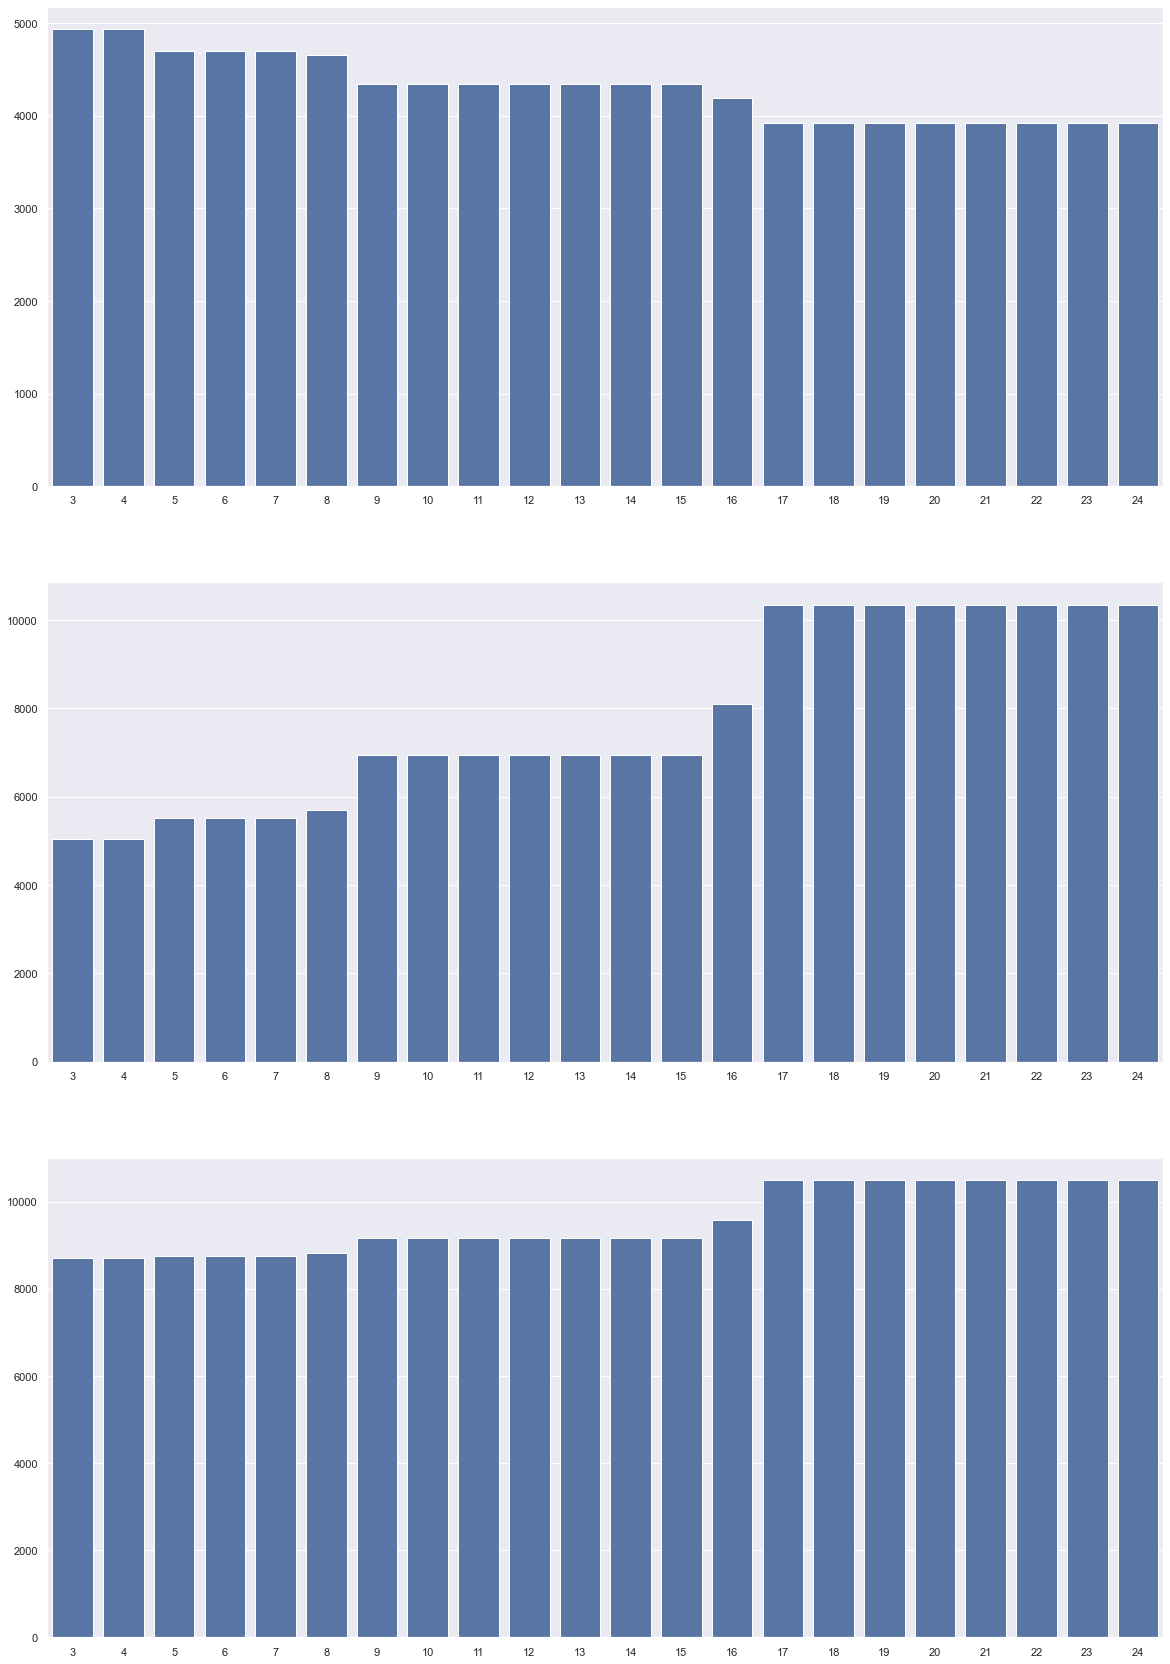

In [273]:
s_values = [x for x in range(3, 25)]
comparisons_df1k = pd.DataFrame(index=s_values)
idx = 0

f, axes = plt.subplots(3, 1, figsize=(20,30))
for col in ['Ascending', 'Descending', 'rand1']:
    comparisons_counts = []
    for s in s_values:
        temp_arr = data1k[col].tolist()
        arr, comparisons = hybridsort(temp_arr, s)
        comparisons_counts.append(comparisons)
    comparisons_df1k[col] = comparisons_counts
    sb.barplot(x=s_values, y=comparisons_counts, ax=axes[idx], color='b')
    idx += 1

    Ascending  Descending  rand1
3        4932        5044   8706
4        4932        5044   8703
5        4700        5508   8754
6        4700        5508   8754
7        4700        5508   8754
8        4652        5700   8812
9        4340        6948   9164
10       4340        6948   9164
11       4340        6948   9164
12       4340        6948   9164
13       4340        6948   9164
14       4340        6948   9164
15       4340        6948   9164
16       4196        8100   9579
17       3916       10340  10485
18       3916       10340  10485
19       3916       10340  10485
20       3916       10340  10485
21       3916       10340  10485
22       3916       10340  10485
23       3916       10340  10485
24       3916       10340  10485


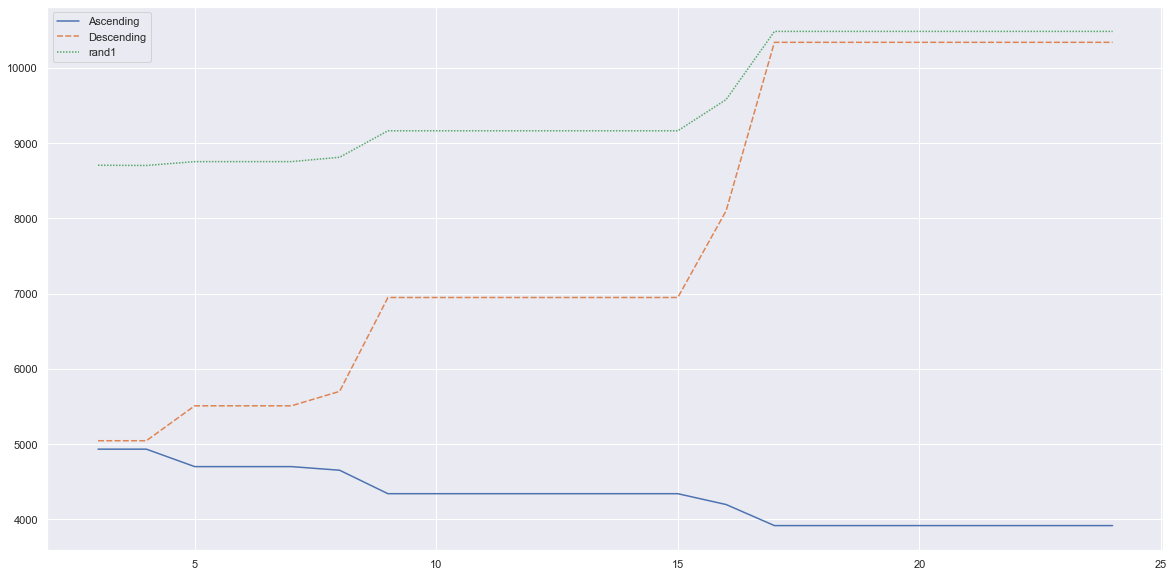

In [274]:
f, axes = plt.subplots(figsize=(20,10))
sb.lineplot(data = comparisons_df1k, ax = axes)
print(comparisons_df1k)

<b>When the input size is fixed to 10,000</b>

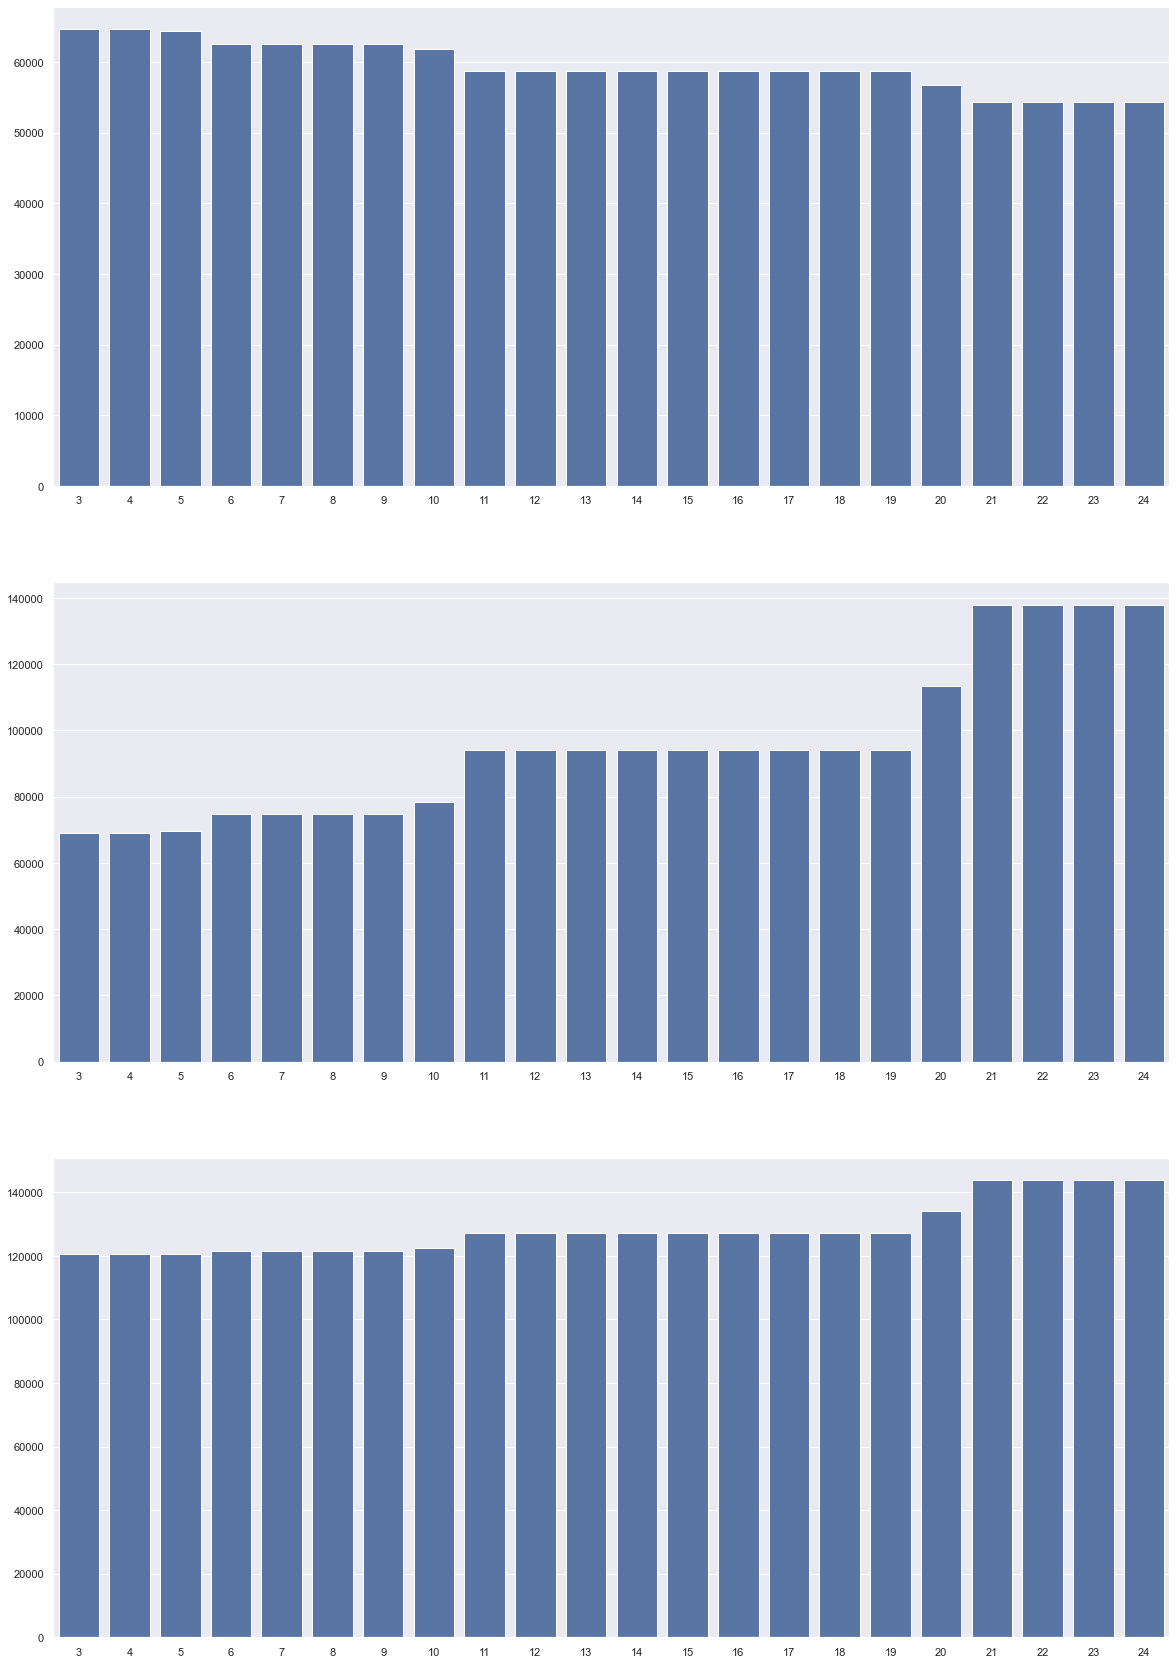

In [275]:
s_values = [x for x in range(3, 25)]
comparisons_df10k = pd.DataFrame(index=s_values)
idx = 0

f, axes = plt.subplots(3, 1, figsize=(20,30))
for col in ['Ascending', 'Descending', 'rand1']:
    comparisons_counts = []
    for s in s_values:
        temp_arr = data10k[col].tolist()
        arr, comparisons = hybridsort(temp_arr, s)
        comparisons_counts.append(comparisons)
    comparisons_df10k[col] = comparisons_counts
    sb.barplot(x=s_values, y=comparisons_counts, ax=axes[idx], color='b')
    idx += 1

    Ascending  Descending   rand1
3       64608       69008  120505
4       64608       69008  120464
5       64368       69488  120496
6       62560       74912  121471
7       62560       74912  121471
8       62560       74912  121471
9       62560       74912  121471
10      61840       78512  122509
11      58704       94192  127225
12      58704       94192  127225
13      58704       94192  127225
14      58704       94192  127225
15      58704       94192  127225
16      58704       94192  127225
17      58704       94192  127225
18      58704       94192  127225
19      58704       94192  127225
20      56784      113392  134154
21      54336      137872  143728
22      54336      137872  143728
23      54336      137872  143728
24      54336      137872  143728


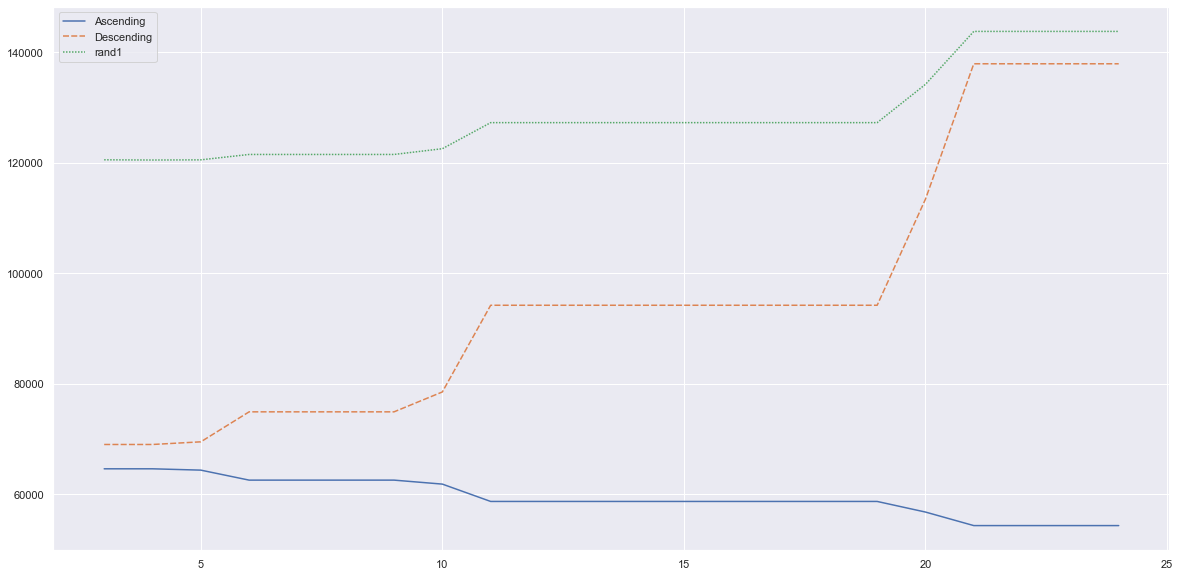

In [276]:
f, axes = plt.subplots(figsize=(20,10))
sb.lineplot(data = comparisons_df10k, ax = axes)
print(comparisons_df10k)

<b>When the input size is fixed at 100,000</b>

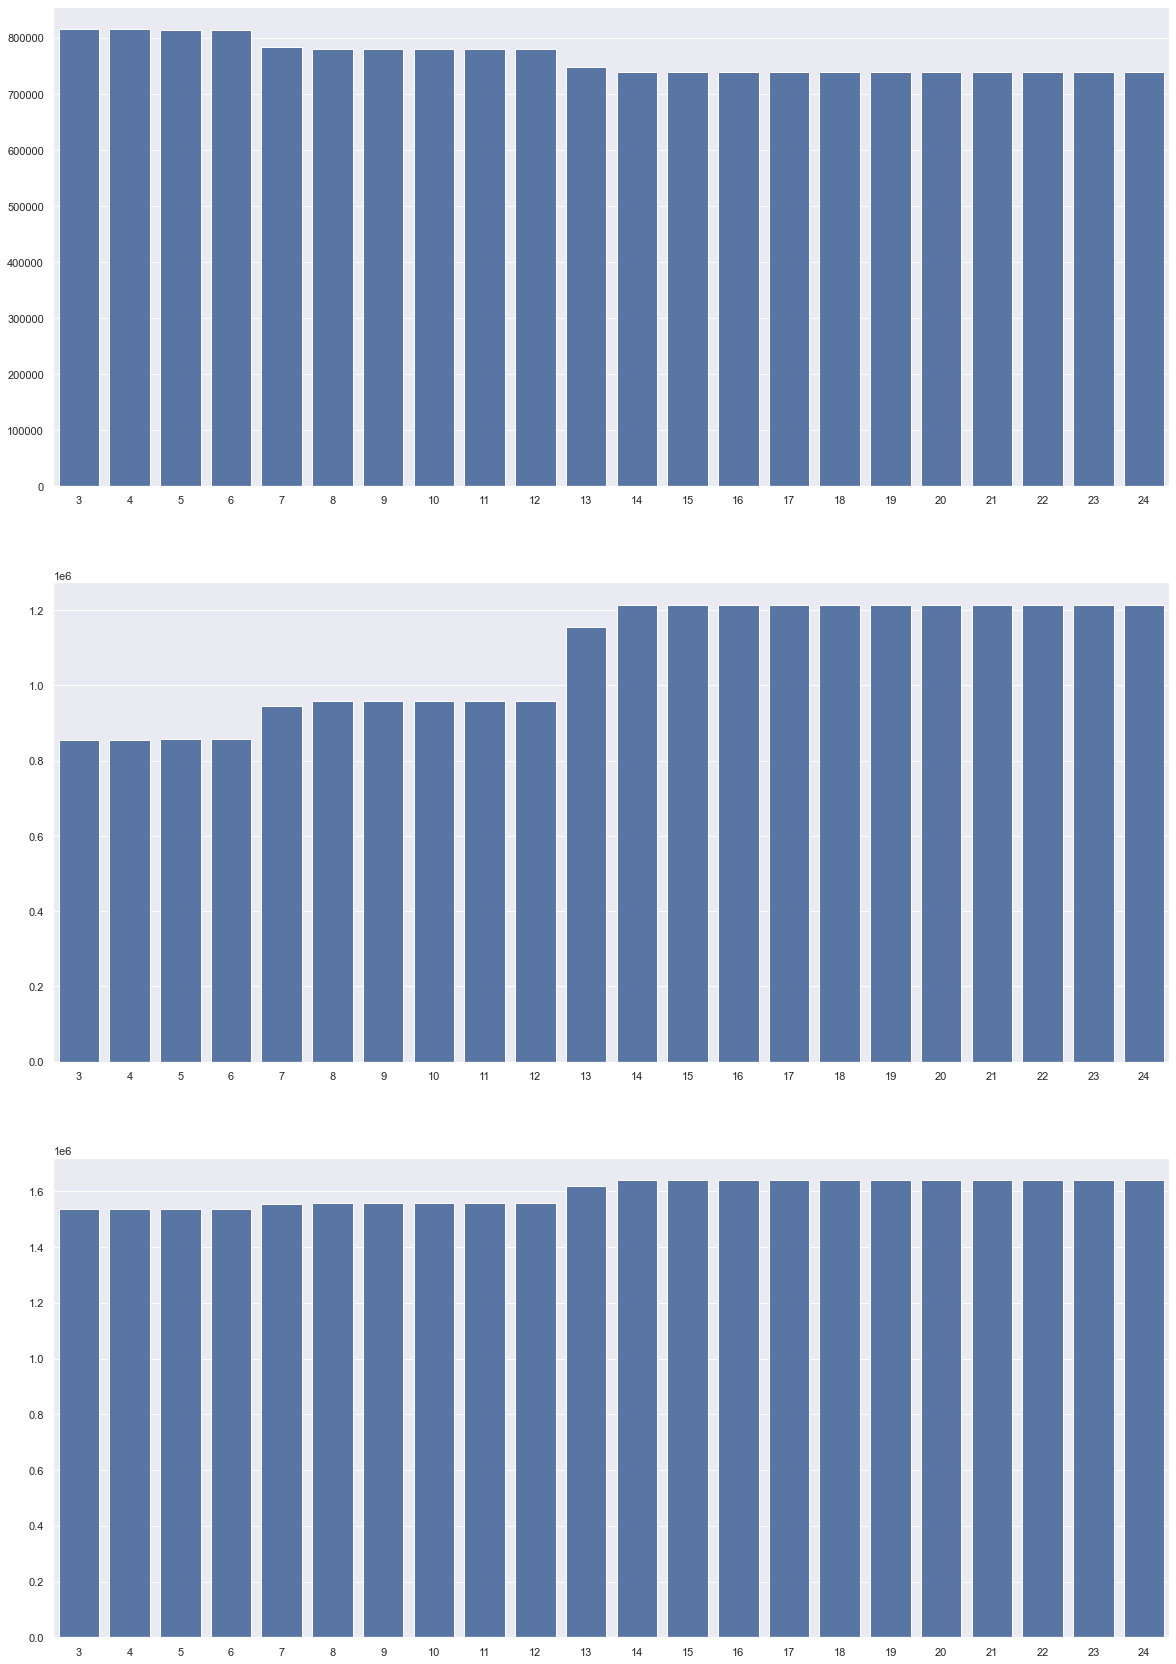

In [277]:
s_values = [x for x in range(3, 25)]
comparisons_df100k = pd.DataFrame(index=s_values)
idx = 0

f, axes = plt.subplots(3, 1, figsize=(20,30))
for col in ['Ascending', 'Descending', 'rand1']:
    comparisons_counts = []
    for s in s_values:
        temp_arr = data100k[col].tolist()
        arr, comparisons = hybridsort(temp_arr, s)
        comparisons_counts.append(comparisons)
    comparisons_df100k[col] = comparisons_counts
    sb.barplot(x=s_values, y=comparisons_counts, ax=axes[idx], color='b')
    idx += 1

    Ascending  Descending    rand1
3      815024      853904  1536334
4      815024      853904  1536258
5      813328      857296  1536747
6      813328      857296  1536747
7      783952      945424  1554903
8      780560      958992  1558184
9      780560      958992  1558184
10     780560      958992  1558184
11     780560      958992  1558184
12     780560      958992  1558184
13     748080     1153872  1619328
14     739600     1213232  1638737
15     739600     1213232  1638737
16     739600     1213232  1638737
17     739600     1213232  1638737
18     739600     1213232  1638737
19     739600     1213232  1638737
20     739600     1213232  1638737
21     739600     1213232  1638737
22     739600     1213232  1638737
23     739600     1213232  1638737
24     739600     1213232  1638737


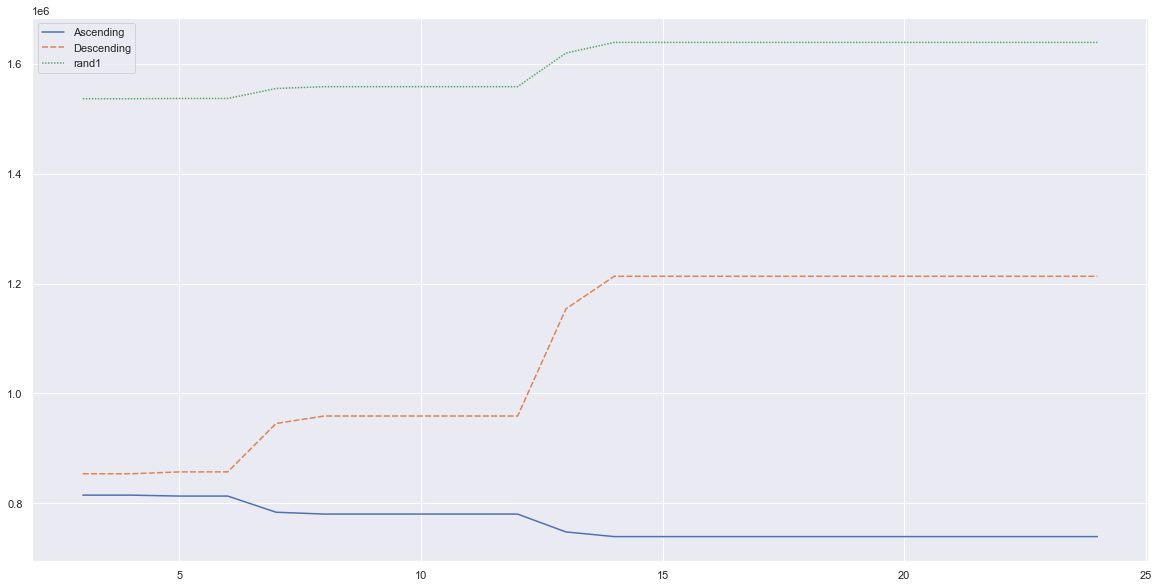

In [278]:
f, axes = plt.subplots(figsize=(20,10))
sb.lineplot(data = comparisons_df100k, ax = axes)
print(comparisons_df100k)

<b>Empirical results vs theoretical analysis</b>
<br>Our empirical results are consistent with our theoretical analysis. For the best case (n + log(n/s)), as s increases, the number of key comparisons decreases. For the average and worst case (ns + nlog(n/s)), the number of key comparisons increases as s increases.

<b>To find the optimal value of s</b>
<br>From our testing above, we see that the range of 7-18 is the middle ground in the number of key comparisons for the best, worst and average cases. However, we believe that to find the optimal value of s, we need to look at the CPU time to understand the tradeoff in recursion overhead.

In [280]:
#import timeit library to keep track of CPU time
import timeit

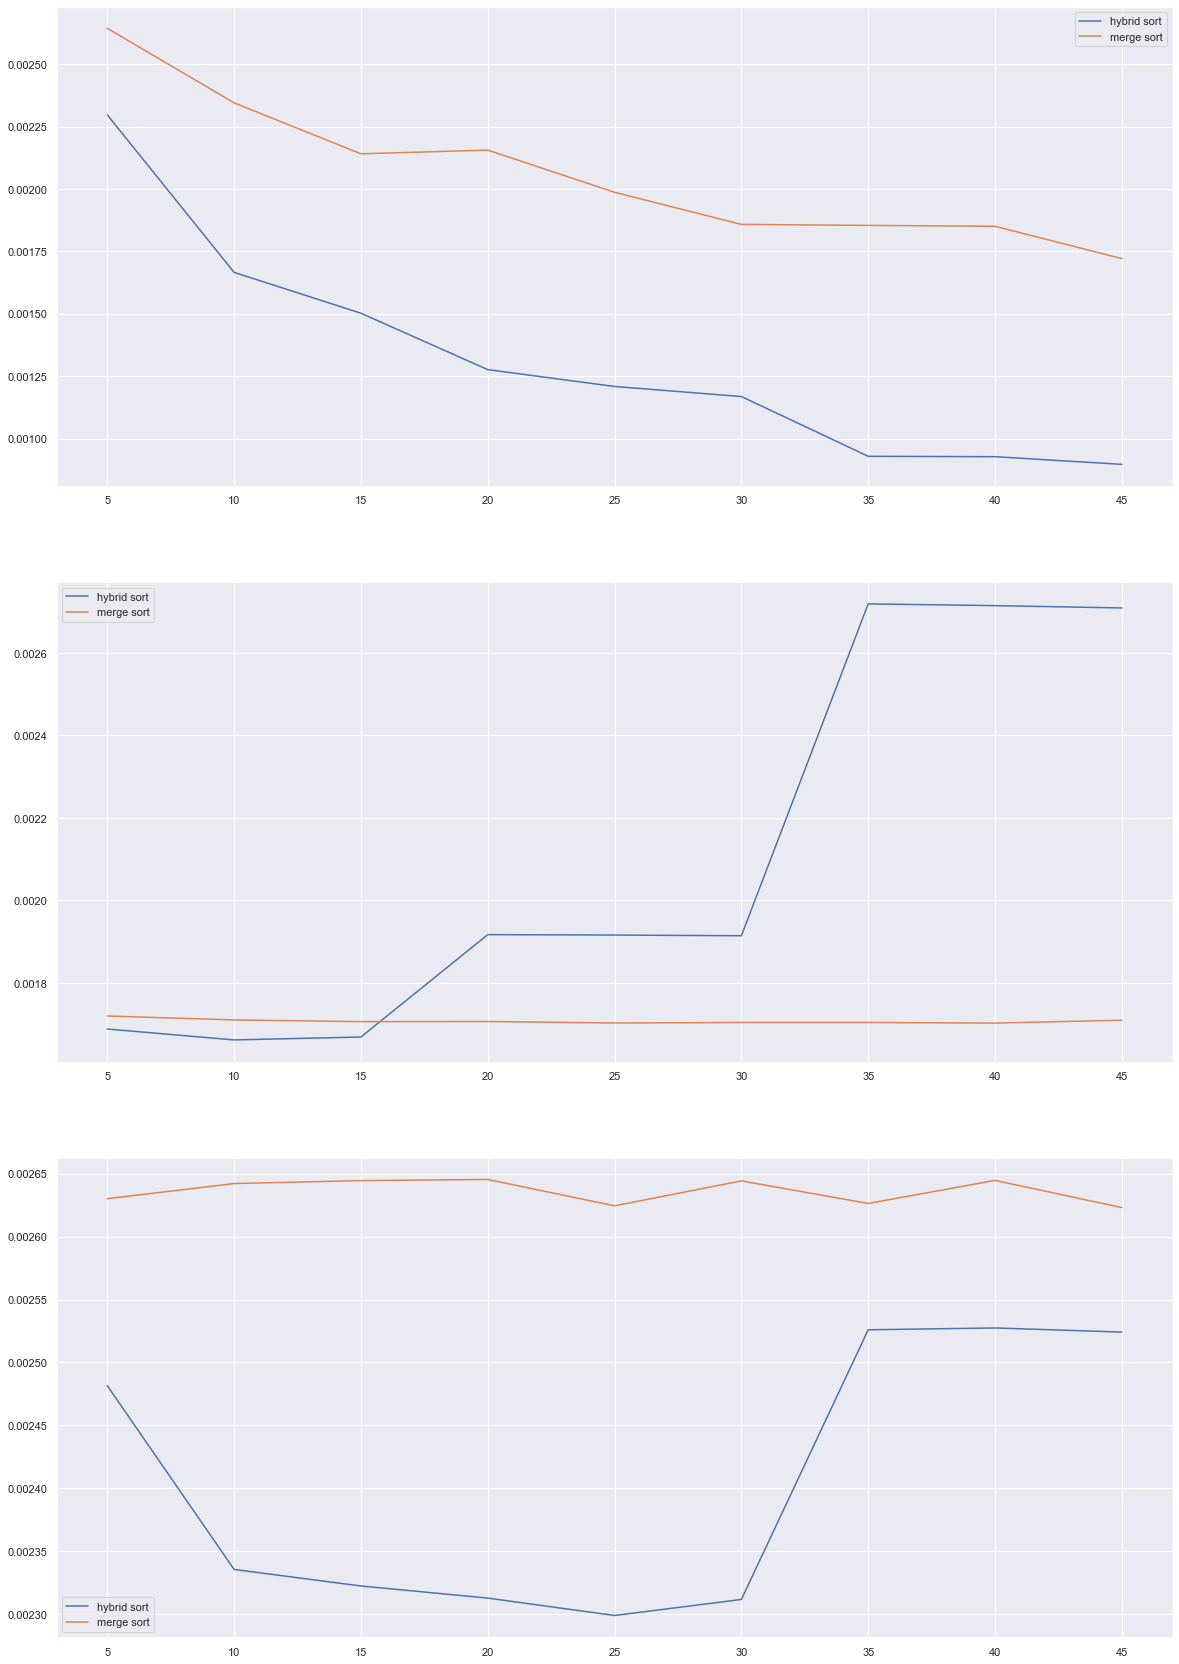

In [312]:
#size 1000
s_values = [x for x in range(5, 50, 5)]
idx = 0

f, axes = plt.subplots(3, 1, figsize=(20,30))
for col in ['Ascending', 'Descending', 'rand1']:
    hybridtimings = []
    mergetimings = []
    for s in s_values:
        temp_arr = data1k[col].tolist()
        beforehybrid = timeit.default_timer()
        hybridsort(temp_arr, s)
        afterhybrid = timeit.default_timer()
        hybridtimings.append(afterhybrid - beforehybrid)
        
        beforemerge = timeit.default_timer()
        mergesort(temp_arr)
        aftermerge = timeit.default_timer()
        mergetimings.append(aftermerge - beforemerge)

    axes[idx].plot(s_values, hybridtimings, label='hybrid sort')
    axes[idx].plot(s_values, mergetimings, label='merge sort')
    axes[idx].legend()
    idx += 1

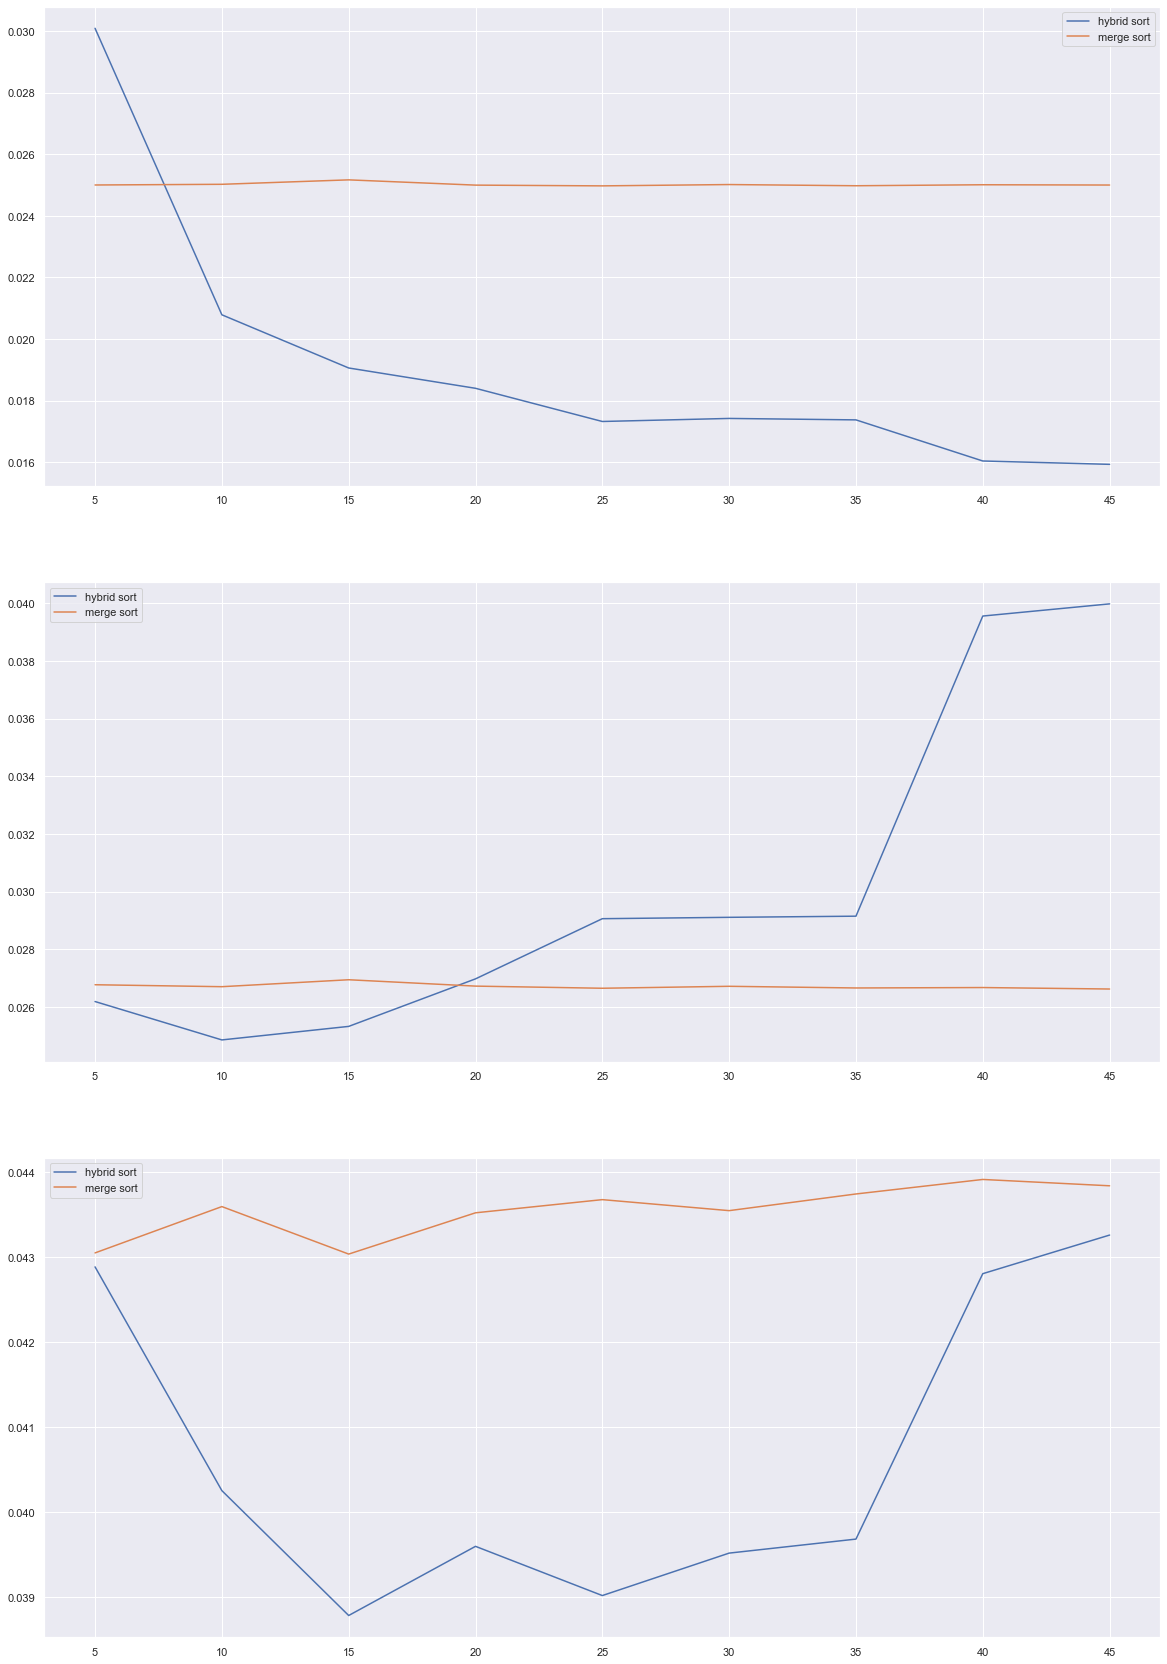

In [315]:
#size 10000
s_values = [x for x in range(5, 50, 5)]
idx = 0

f, axes = plt.subplots(3, 1, figsize=(20,30))
for col in ['Ascending', 'Descending', 'rand1']:
    hybridtimings = []
    mergetimings = []
    for s in s_values:
        temp_arr = data10k[col].tolist()
        beforehybrid = timeit.default_timer()
        hybridsort(temp_arr, s)
        afterhybrid = timeit.default_timer()
        hybridtimings.append(afterhybrid - beforehybrid)
        
        beforemerge = timeit.default_timer()
        mergesort(temp_arr)
        aftermerge = timeit.default_timer()
        mergetimings.append(aftermerge - beforemerge)

    axes[idx].plot(s_values, hybridtimings, label='hybrid sort')
    axes[idx].plot(s_values, mergetimings, label='merge sort')
    axes[idx].legend()
    idx += 1

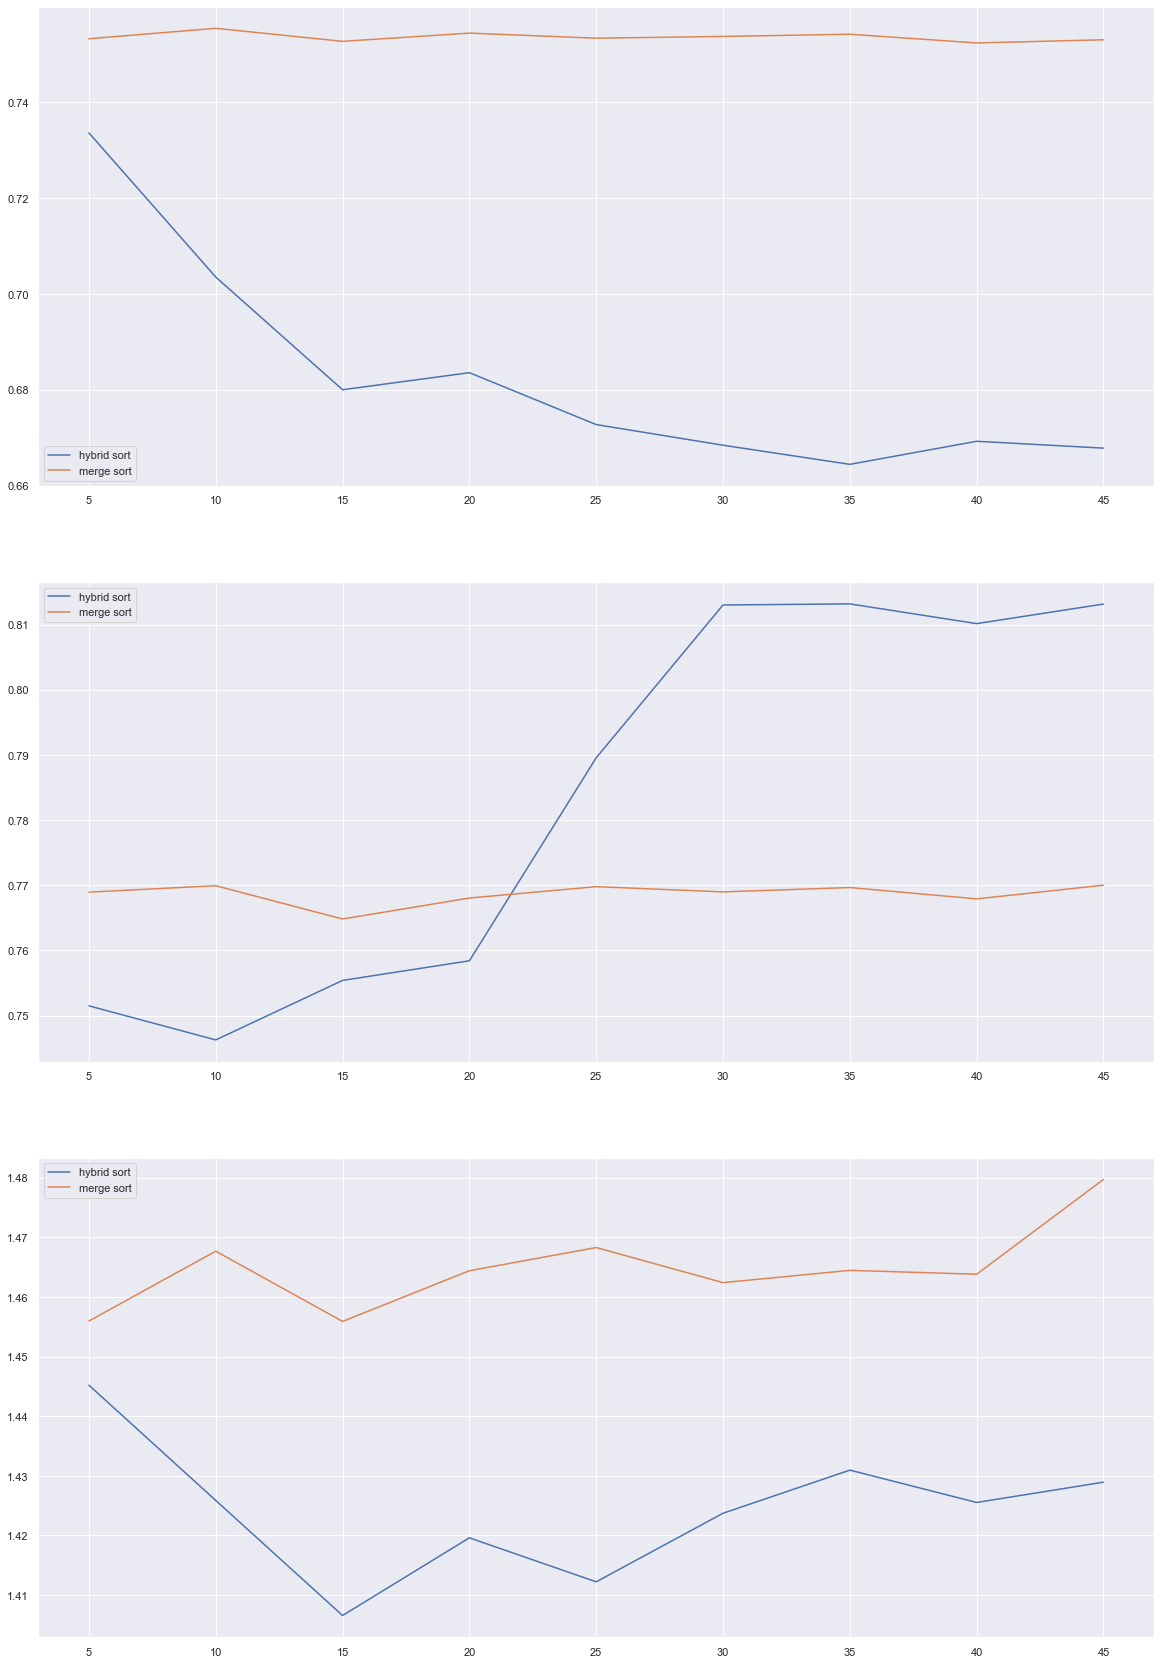

In [316]:
#size 100000
s_values = [x for x in range(5, 50, 5)]
idx = 0

f, axes = plt.subplots(3, 1, figsize=(20,30))
for col in ['Ascending', 'Descending', 'rand1']:
    hybridtimings = []
    mergetimings = []
    for s in s_values:
        temp_arr = data100k[col].tolist()
        beforehybrid = timeit.default_timer()
        hybridsort(temp_arr, s)
        afterhybrid = timeit.default_timer()
        hybridtimings.append(afterhybrid - beforehybrid)
        
        beforemerge = timeit.default_timer()
        mergesort(temp_arr)
        aftermerge = timeit.default_timer()
        mergetimings.append(aftermerge - beforemerge)

    axes[idx].plot(s_values, hybridtimings, label='hybrid sort')
    axes[idx].plot(s_values, mergetimings, label='merge sort')
    axes[idx].legend()
    idx += 1

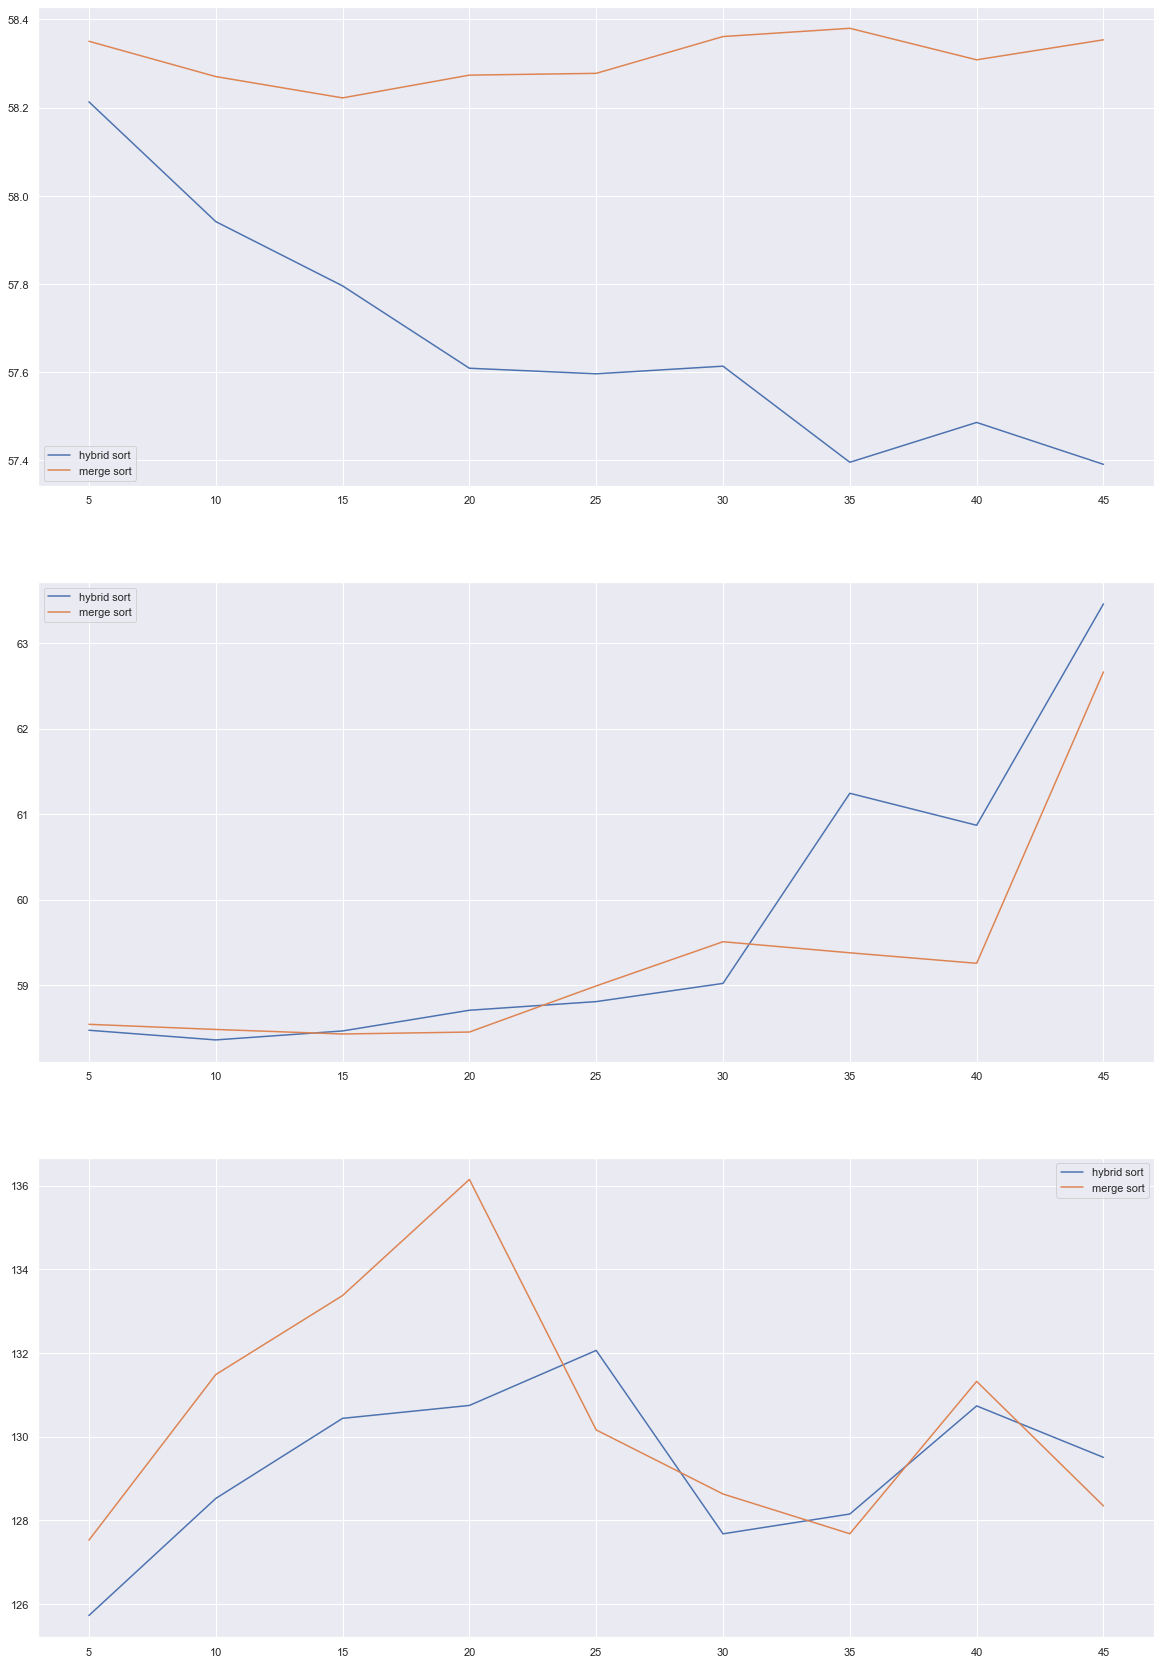

In [317]:
#size 1000000
s_values = [x for x in range(5, 50, 5)]
idx = 0

f, axes = plt.subplots(3, 1, figsize=(20,30))
for col in ['Ascending', 'Descending', 'rand1']:
    hybridtimings = []
    mergetimings = []
    for s in s_values:
        temp_arr = data1m[col].tolist()
        beforehybrid = timeit.default_timer()
        hybridsort(temp_arr, s)
        afterhybrid = timeit.default_timer()
        hybridtimings.append(afterhybrid - beforehybrid)
        
        beforemerge = timeit.default_timer()
        mergesort(temp_arr)
        aftermerge = timeit.default_timer()
        mergetimings.append(aftermerge - beforemerge)

    axes[idx].plot(s_values, hybridtimings, label='hybrid sort')
    axes[idx].plot(s_values, mergetimings, label='merge sort')
    axes[idx].legend()
    idx += 1